In [2]:
pip install matplotlib pandas seaborn scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from matplotlib.ticker import MaxNLocator, FormatStrFormatter
import joblib
from datetime import datetime, timedelta

In [4]:
# Load data
produk = pd.read_csv('1data_produk.csv')
customer = pd.read_csv('2data_customer.csv')
transaksi = pd.read_csv('3data_transaksi.csv')
reviews = pd.read_csv('4data_rating.csv')

In [5]:
produk.head()
produk.dtypes

ProductID           int64
NamaProduk         object
Kategori           object
Harga               int64
KuantitasBarang     int64
dtype: object

In [6]:
customer.head()

,CustomerID,Nama,Usia,JenisKelamin,Daerah
0,1,Alif Rahman,28,L,Banyumanik
1,2,Gea Danisha,34,P,Gajahmungkur
2,3,Alisa Yudhani,22,P,Genuk
3,4,Yusuf Gerry,45,L,Gunungpati
4,5,Bulan Pertiwi,31,P,Ngaliyan


In [7]:
transaksi.head()

,TransactionID,CustomerID,ProductID,Kuantitas,TanggalTransaksi
0,1,1,1,1,2024-05-01
1,2,2,3,2,2024-05-03
2,3,3,4,1,2024-05-03
3,4,4,2,1,2024-05-06
4,5,5,5,1,2024-05-10


In [8]:
reviews.head()

,ReviewID,CustomerID,ProductID,Rating,TanggalReview
0,1,1,1,5,2024-05-11
1,2,2,3,4,2024-05-12
2,3,3,4,3,2024-05-13
3,4,4,2,4,2024-05-14
4,5,5,5,5,2024-05-15


In [9]:
df_products = pd.DataFrame(produk)
df_transactions = pd.DataFrame(transaksi)
df_customer = pd.DataFrame(customer)
df_rating = pd.DataFrame(reviews)

In [10]:
df_products

,ProductID,NamaProduk,Kategori,Harga,KuantitasBarang
0,1,Smartphone X,Elektronik,999,50
1,2,Laptop Y,Elektronik,1500,30
2,3,Headphones Z,Elektronik,199,100
3,4,Coffee Maker A,Home Goods,79,75
4,5,Blender B,Home Goods,129,60


In [11]:
df_products.dtypes

ProductID           int64
NamaProduk         object
Kategori           object
Harga               int64
KuantitasBarang     int64
dtype: object

In [12]:
df_transactions.dtypes

TransactionID        int64
CustomerID           int64
ProductID            int64
Kuantitas            int64
TanggalTransaksi    object
dtype: object

In [13]:
merge_transaksi = pd.merge(df_transactions, df_products[['ProductID', 'NamaProduk', 'Kategori']], on='ProductID')

merge_transaksi

,TransactionID,CustomerID,ProductID,Kuantitas,TanggalTransaksi,NamaProduk,Kategori
0,1,1,1,1,2024-05-01,Smartphone X,Elektronik
1,2,2,3,2,2024-05-03,Headphones Z,Elektronik
2,3,3,4,1,2024-05-03,Coffee Maker A,Home Goods
3,4,4,2,1,2024-05-06,Laptop Y,Elektronik
4,5,5,5,1,2024-05-10,Blender B,Home Goods
5,6,6,4,5,2024-05-11,Coffee Maker A,Home Goods
6,7,7,2,2,2024-05-13,Laptop Y,Elektronik
7,8,8,3,4,2024-05-14,Headphones Z,Elektronik
8,9,9,4,2,2024-05-15,Coffee Maker A,Home Goods
9,10,10,4,4,2024-05-16,Coffee Maker A,Home Goods


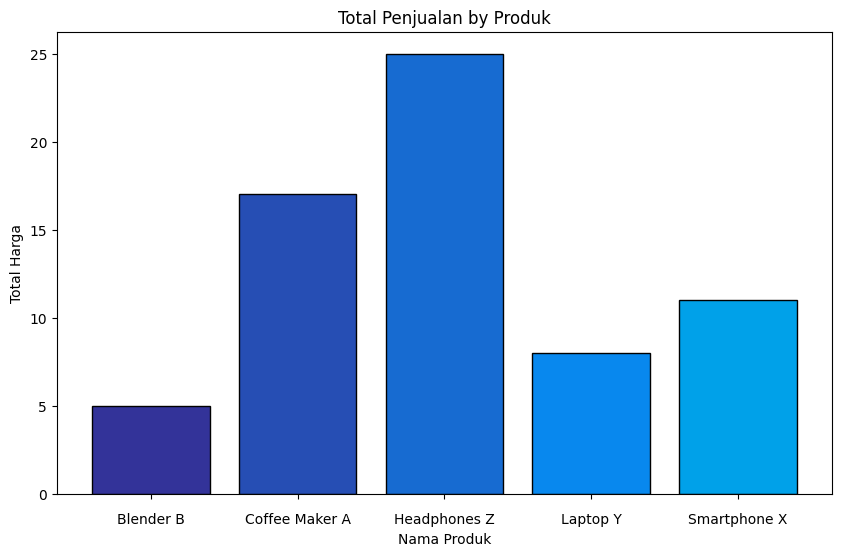

In [14]:
# Pertanyaan 1A
grouped_data = merge_transaksi.groupby('NamaProduk')['Kuantitas'].sum().reset_index()

n_bars = len(merge_transaksi['NamaProduk'])
colors = plt.cm.terrain(np.linspace(0, 1, n_bars))

plt.figure(figsize=(10, 6))
plt.bar(grouped_data['NamaProduk'], grouped_data['Kuantitas'], color=colors, edgecolor='black')
plt.title('Total Penjualan by Produk')
plt.xlabel('Nama Produk')
plt.ylabel('Total Harga')


# Adjusting x-axis labels for better spacing
plt.xticks(rotation=0, ha='center', va='top', fontsize=10)
ax = plt.gca()  # Get current axis
ax.tick_params(axis='x', pad=10) 

In [16]:
#Menggabungkan Data Transaksi dan Customer
merge_transaksi_customer = pd.merge(df_transactions, df_customer, on='CustomerID')

merge_transaksi_customer

,TransactionID,CustomerID,ProductID,Kuantitas,TanggalTransaksi,Nama,Usia,JenisKelamin,Daerah
0,1,1,1,1,2024-05-01,Alif Rahman,28,L,Banyumanik
1,2,2,3,2,2024-05-03,Gea Danisha,34,P,Gajahmungkur
2,3,3,4,1,2024-05-03,Alisa Yudhani,22,P,Genuk
3,4,4,2,1,2024-05-06,Yusuf Gerry,45,L,Gunungpati
4,5,5,5,1,2024-05-10,Bulan Pertiwi,31,P,Ngaliyan
5,6,6,4,5,2024-05-11,Ilham Arya,39,L,Banyumanik
6,7,7,2,2,2024-05-13,Wahidin,56,L,Banyumanik
7,8,8,3,4,2024-05-14,Yustina,35,P,Gunungpati
8,9,9,4,2,2024-05-15,Bintang Agung,20,L,Gajahmungkur
9,10,10,4,4,2024-05-16,Gisel Natanya,22,P,Genuk


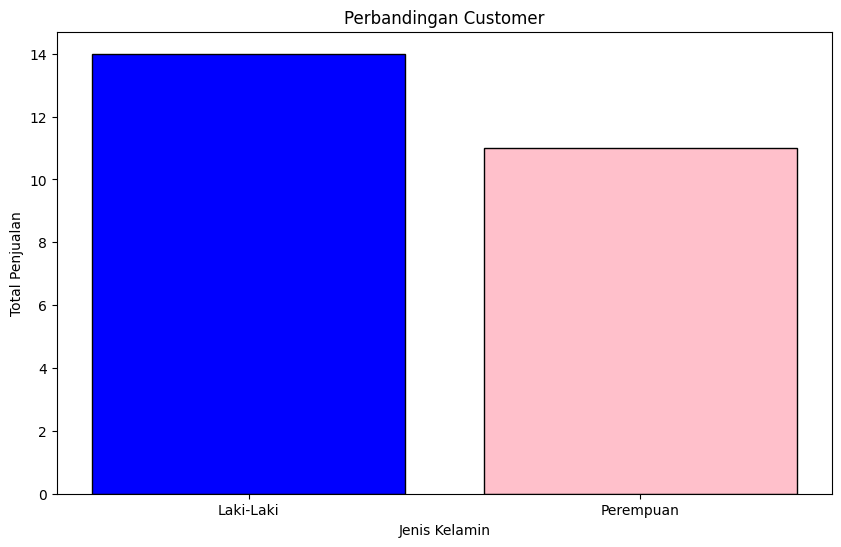

In [17]:
#Pertanyaan 1B

grouped_data_customer = merge_transaksi_customer.groupby('JenisKelamin')['Kuantitas'].sum().reset_index()
gender_counts = merge_transaksi_customer['JenisKelamin'].value_counts()
gender_counts = gender_counts.astype(int) 
labels = ['Laki-Laki', 'Perempuan']

# Membuat barplot
plt.figure(figsize=(10, 6))
plt.bar(labels, gender_counts, color=['blue', 'pink'], edgecolor='black')
plt.title('Perbandingan Customer')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Total Penjualan')

# Mengatur ylabel menjadi bilangan bulat
ax = plt.gca()
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))

plt.show()

In [18]:
#Membuat range usia

bins = [20, 26, 31, 36, 41, float('inf')]
labels = ['20-25', '26-30', '31-35', '36-40', '41+']
merge_transaksi_customer['RangeUsia'] = pd.cut(merge_transaksi_customer['Usia'], bins=bins, labels=labels, right=False)


merge_transaksi_customer

,TransactionID,CustomerID,ProductID,Kuantitas,TanggalTransaksi,Nama,Usia,JenisKelamin,Daerah,RangeUsia
0,1,1,1,1,2024-05-01,Alif Rahman,28,L,Banyumanik,26-30
1,2,2,3,2,2024-05-03,Gea Danisha,34,P,Gajahmungkur,31-35
2,3,3,4,1,2024-05-03,Alisa Yudhani,22,P,Genuk,20-25
3,4,4,2,1,2024-05-06,Yusuf Gerry,45,L,Gunungpati,41+
4,5,5,5,1,2024-05-10,Bulan Pertiwi,31,P,Ngaliyan,31-35
5,6,6,4,5,2024-05-11,Ilham Arya,39,L,Banyumanik,36-40
6,7,7,2,2,2024-05-13,Wahidin,56,L,Banyumanik,41+
7,8,8,3,4,2024-05-14,Yustina,35,P,Gunungpati,31-35
8,9,9,4,2,2024-05-15,Bintang Agung,20,L,Gajahmungkur,20-25
9,10,10,4,4,2024-05-16,Gisel Natanya,22,P,Genuk,20-25


In [19]:
#Menghitung setiap range usia
rangeusia_count = merge_transaksi_customer['RangeUsia'].value_counts()
rangeusia_count

RangeUsia
20-25    8
26-30    5
31-35    5
36-40    5
41+      2
Name: count, dtype: int64

C:\Users\cathe\AppData\Local\Temp\ipykernel_17556\929226342.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data_customer_age = merge_transaksi_customer.groupby('RangeUsia')['Kuantitas'].sum().reset_index()


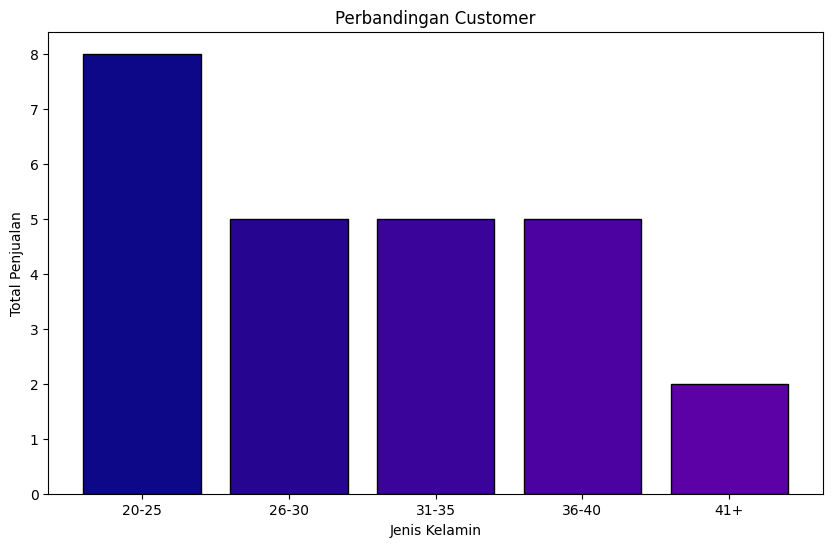

In [20]:
#Pertanyaan 1C

grouped_data_customer_age = merge_transaksi_customer.groupby('RangeUsia')['Kuantitas'].sum().reset_index()
grouped_data_customer_age


# Number of bars
n_bars = len(merge_transaksi_customer["RangeUsia"])

# Generate a list of colors dynamically
# Here we create a colormap and generate a color for each bar
colors = plt.cm.plasma(np.linspace(0, 1, n_bars))

# Membuat barplot
plt.figure(figsize=(10, 6))
plt.bar(grouped_data_customer_age['RangeUsia'], rangeusia_count,color=colors, edgecolor='black')
plt.title('Perbandingan Customer')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Total Penjualan')

# Mengatur ylabel menjadi bilangan bulat
ax = plt.gca()
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))

plt.show()

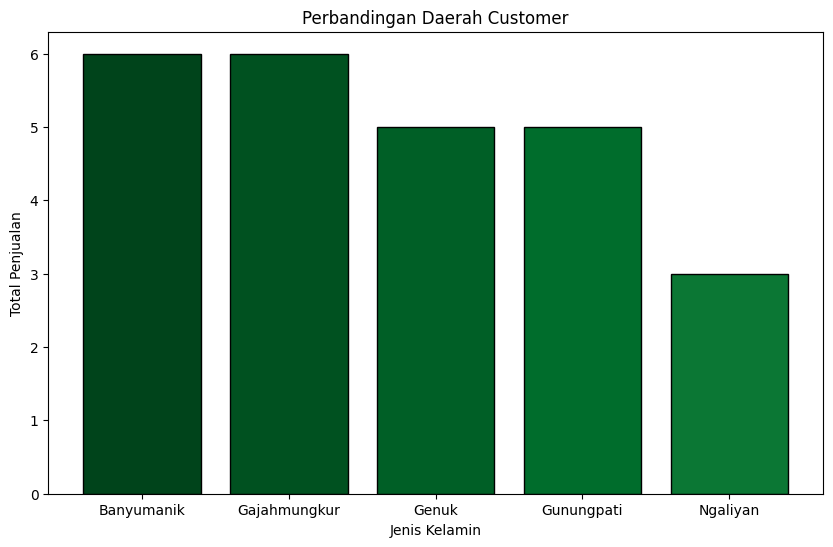

In [21]:
#Pertanyaan 1D

daerah_count = merge_transaksi_customer['Daerah'].value_counts()
grouped_data_daerah = merge_transaksi_customer.groupby('Daerah')['Kuantitas'].sum().reset_index()

n_bars = len(merge_transaksi_customer['Daerah'])
colors = plt.cm.Greens_r(np.linspace(0, 1, n_bars))


# Membuat barplot
plt.figure(figsize=(10, 6))
plt.bar(grouped_data_daerah['Daerah'], daerah_count,color=colors, edgecolor='black')
plt.title('Perbandingan Daerah Customer')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Total Penjualan')


# Mengatur ylabel menjadi bilangan bulat
ax = plt.gca()
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))

plt.show()

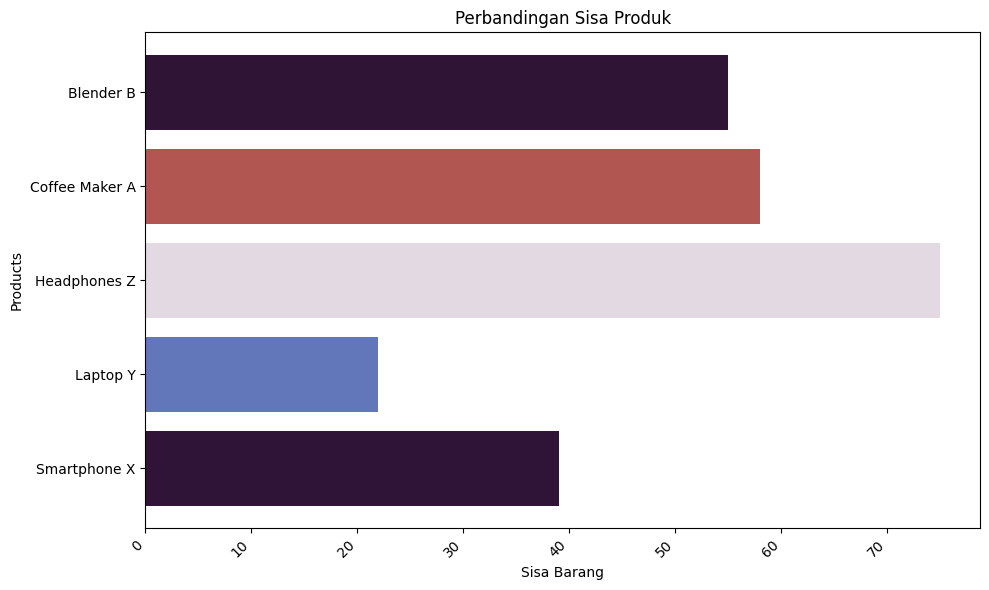

In [22]:
#Pertanyaan 1E

#Penjualan Setiap Barang
total_sold = df_transactions.groupby('ProductID')['Kuantitas'].sum().reset_index()

n_bars = len(df_products['NamaProduk'])
colors = plt.cm.twilight_shifted(np.linspace(0, 1, n_bars))

# Merge produk dan transaksi
merged_df = pd.merge(df_products, total_sold, on='ProductID', how='left')
merged_df['RemainingQuantity'] = merged_df['KuantitasBarang'] - merged_df['Kuantitas']

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.barh(merged_df['NamaProduk'], merged_df['RemainingQuantity'], color=colors)
plt.xlabel('Sisa Barang')
plt.ylabel('Products')
plt.title('Perbandingan Sisa Produk')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


plt.show()

Pertanyaan 2

In [23]:
elektronik_data = merge_transaksi[merge_transaksi['Kategori'] == 'Elektronik'].reset_index(drop=True)
home_goods_data = merge_transaksi[merge_transaksi['Kategori'] == 'Home Goods'].reset_index(drop=True)


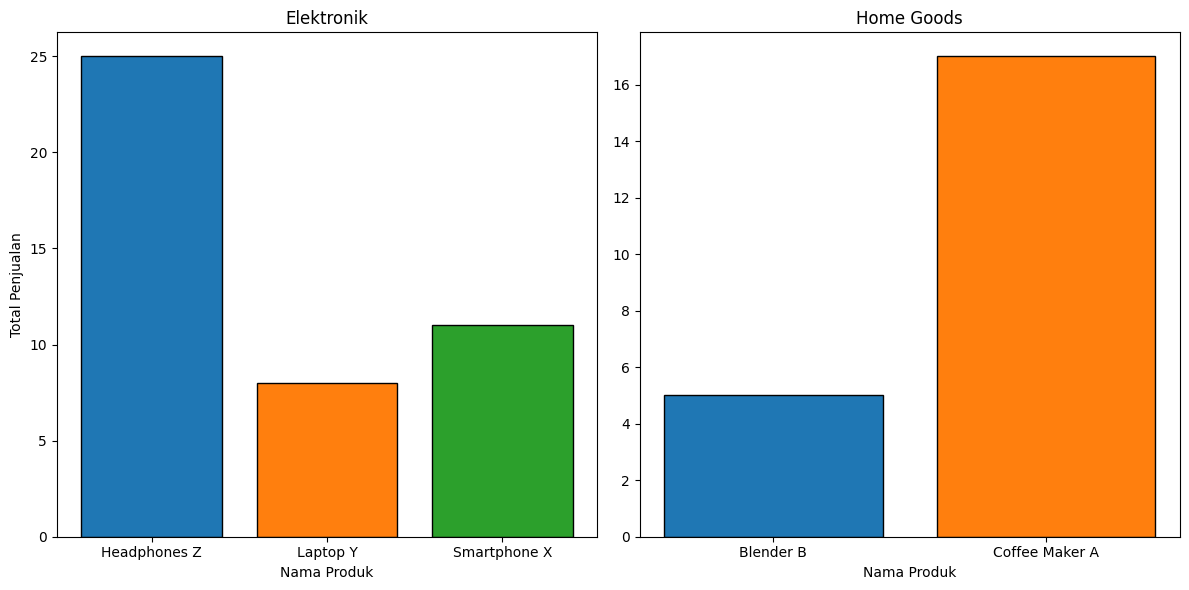

In [24]:
# Pertanyaan 2A

# Plotting kedua Kategori
plt.figure(figsize=(12, 6))

# Plot for Elektronik
plt.subplot(1, 2, 1)
elektronik_grouped = elektronik_data.groupby('NamaProduk')['Kuantitas'].sum().reset_index()
n_bars_e = len(elektronik_grouped['NamaProduk'])
colors_e = plt.cm.tab10(range(n_bars_e))
plt.bar(elektronik_grouped['NamaProduk'], elektronik_grouped['Kuantitas'], color=colors_e, edgecolor='black')
plt.xlabel('Nama Produk')
plt.ylabel('Total Penjualan')
plt.title('Elektronik')

# Plot for Home Goods
plt.subplot(1, 2, 2)
home_goods_grouped = home_goods_data.groupby('NamaProduk')['Kuantitas'].sum().reset_index()
n_bars_h = len(home_goods_grouped['NamaProduk'])
colors_h = plt.cm.tab10(range(n_bars_h))
plt.bar(home_goods_grouped['NamaProduk'], home_goods_grouped['Kuantitas'], color=colors_h, edgecolor='black')
plt.xlabel('Nama Produk')
plt.title('Home Goods')


plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Perbandigan Penjualan Barang per Kategori')

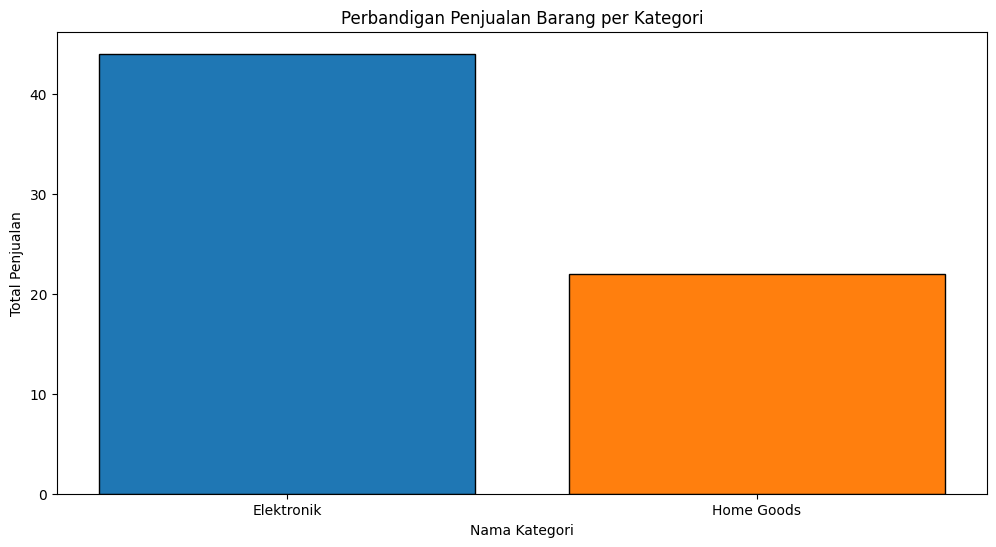

In [25]:
#Pertanyaan 2B

plt.figure(figsize=(12, 6))
grouped_data_kategori = merge_transaksi.groupby('Kategori')['Kuantitas'].sum().reset_index()
n_bars_e = len(grouped_data_kategori['Kategori'])
colors_e = plt.cm.tab10(range(n_bars_e))
plt.bar(grouped_data_kategori['Kategori'], grouped_data_kategori['Kuantitas'], color=colors_e, edgecolor='black')
plt.xlabel('Nama Kategori')
plt.ylabel('Total Penjualan')
plt.title('Perbandigan Penjualan Barang per Kategori')

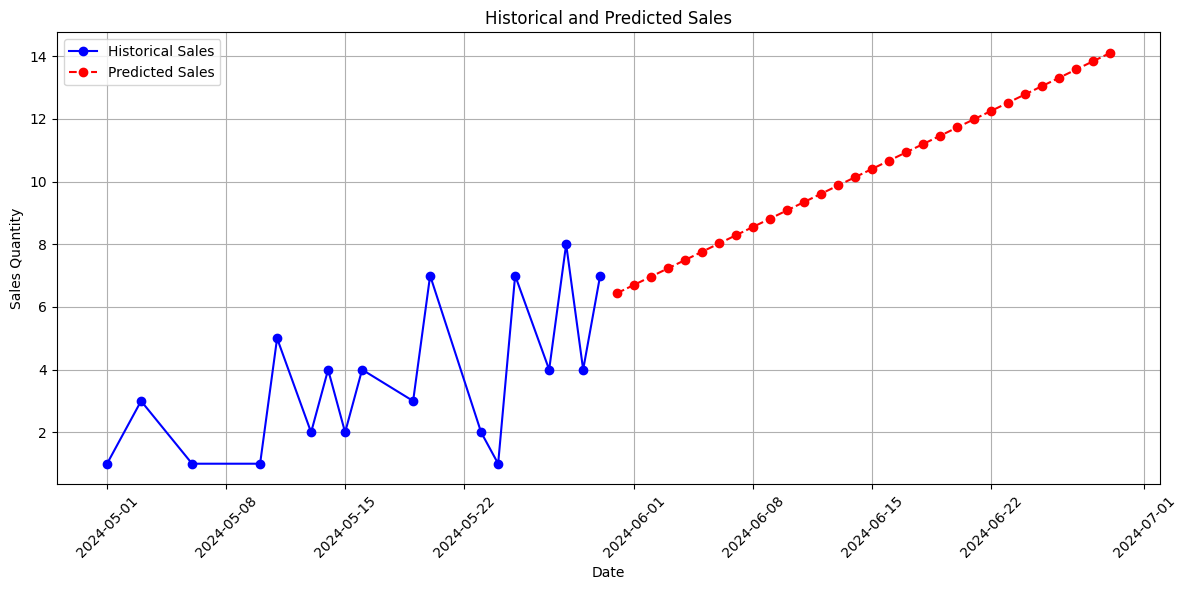

In [26]:
#Pertanyaan 2C

# Convert data to DataFrame
df = pd.DataFrame(merge_transaksi)
df['TanggalTransaksi'] = pd.to_datetime(df['TanggalTransaksi'])

# Mencari Daily Sales tiap Tanggal
daily_sales = df.groupby('TanggalTransaksi')['Kuantitas'].sum().reset_index()

# Train Linear Regression
X = daily_sales.index.values.reshape(-1, 1)  # Using index as a simple feature (day number)
y = daily_sales['Kuantitas']

model = LinearRegression()
model.fit(X, y)

# Membuat Prediksi terhadap beberapa hari kedepan
days_ahead = 30
future_dates = [daily_sales['TanggalTransaksi'].max() + timedelta(days=i) for i in range(1, days_ahead + 1)]
future_indices = len(daily_sales) + pd.Series(range(1, days_ahead + 1))
future_indices = future_indices.values.reshape(-1, 1)

predicted_sales = model.predict(future_indices)

# Plot Transaksi dan Prediksi
plt.figure(figsize=(12, 6))

# Plot untuk Transaksi
plt.plot(daily_sales['TanggalTransaksi'], daily_sales['Kuantitas'], marker='o', linestyle='-', color='b', label='Historical Sales')

# Plot Prediksi Transaksi 30 hari kedepan
plt.plot(future_dates, predicted_sales, marker='o', linestyle='--', color='r', label='Predicted Sales')

# Label
plt.xlabel('Date')
plt.ylabel('Sales Quantity')
plt.title('Historical and Predicted Sales')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.legend()
plt.show()

<Figure size 1000x600 with 0 Axes>

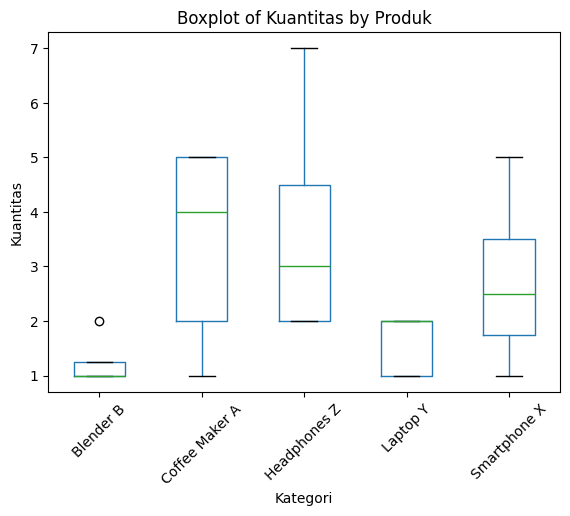

In [27]:
# Plotting a boxplot for Kuantitas across Kategori (Categories)
plt.figure(figsize=(10, 6))
df.boxplot(column='Kuantitas', by='NamaProduk', grid=False)
plt.title('Boxplot of Kuantitas by Produk')
plt.suptitle('')  # Suppress the automatic title from pandas boxplot
plt.xlabel('Kategori')
plt.ylabel('Kuantitas')
plt.xticks(rotation=45)
plt.show()